In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Task 1 – Replacement of batch ID

In [152]:
# Load data from the provided files
heating_time_df = pd.read_excel('/Users/krzysztof/Documents/Projekty/zadanie_rekrutacyjne/case_study/HeatingTime.xlsx')
tank_temperature_df = pd.read_csv('/Users/krzysztof/Documents/Projekty/zadanie_rekrutacyjne/case_study/TankTemperature.csv')
batch_id_df = pd.read_excel('/Users/krzysztof/Documents/Projekty/zadanie_rekrutacyjne/case_study/BatchID.xlsx')

In [153]:
# Display the first few rows of each DataFrame 
print(heating_time_df.head())
print(tank_temperature_df.head())
print(batch_id_df.head())

     ID               Start                 End
0  HF-1 2019-03-25 07:30:00 2019-03-25 09:42:00
1  HF-2 2019-04-15 09:42:00 2019-04-15 11:54:00
2  HF-3 2019-04-29 11:54:00 2019-04-29 13:42:00
3  HF-4 2019-05-13 13:42:00 2019-05-13 15:42:00
4  HF-5 2019-06-03 15:42:00 2019-06-03 18:00:00
              Datetime      Value
0  2019-03-22 00:00:00  15.000000
1  2019-03-22 00:01:00  15.168294
2  2019-03-22 00:02:00  15.181859
3  2019-03-22 00:03:00  15.028224
4  2019-03-22 00:04:00  14.848640
  Batch_ID               Start                 End
0   ACCS-1 2019-02-22 06:30:00 2019-02-27 10:40:26
1   ACCS-2 2019-03-09 10:40:26 2019-03-14 12:45:39
2   ACCS-3 2019-03-23 07:30:00 2019-03-28 10:37:50
3   ACCS-4 2019-04-05 09:42:00 2019-04-10 13:52:26
4   ACCS-5 2019-04-13 09:42:00 2019-04-25 15:57:39


In [154]:
# Renaming of columns
tank_temperature_df.rename(columns={'Datetime': 'Timestamp', 'Value': 'Temperature'}, inplace=True)

In [155]:
# Merge heating_time_df with batch_id_df on the 'Start' column (the most recent row from batch_id_df where the 'Start' value is less than or equal to the 'Start' value from heating_time_df)
merged_df = pd.merge_asof(heating_time_df.sort_values('Start'), 
                          batch_id_df.sort_values('Start'), 
                          on='Start', 
                          direction='backward')

In [156]:
# Merge of the merged_df DataFrame with the selected columns from batch_id_df on the 'Batch_ID' column using a left join. This adds the 'Start' column from batch_id_df to merged_df.
merged_df = pd.merge(merged_df, batch_id_df[['Batch_ID', 'Start']], on='Batch_ID', how='left')

# Create the new Batch ID format
merged_df['Replacement_Batch_ID'] = merged_df['Start_y'].dt.strftime('%Y-%m-%d') + ': ' + merged_df['Batch_ID']

# Select and rename the columns to match the desired format
task1_df = merged_df[['Replacement_Batch_ID', 'Start_x', 'End_x']]
task1_df = task1_df.rename(columns={
    'Replacement_Batch_ID': 'ID',
    'Start_x': 'Start',
    'End_x': 'End'
})

# Display the result
task1_df


,ID,Start,End
0,2019-03-23: ACCS-3,2019-03-25 07:30:00,2019-03-25 09:42:00
1,2019-04-13: ACCS-5,2019-04-15 09:42:00,2019-04-15 11:54:00
2,2019-04-27: ACCS-6,2019-04-29 11:54:00,2019-04-29 13:42:00
3,2019-05-11: ACCS-8,2019-05-13 13:42:00,2019-05-13 15:42:00
4,2019-05-27: ACCS-10,2019-06-03 15:42:00,2019-06-03 18:00:00
5,2019-06-11: ACCS-12,2019-06-17 18:00:00,2019-06-17 19:54:00
6,2019-06-26: ACCS-15,2019-07-01 19:54:00,2019-07-01 21:54:00
7,2019-07-11: ACCS-17,2019-07-15 21:54:00,2019-07-16 00:06:00
8,2019-08-04: ACCS-20,2019-08-06 00:06:00,2019-08-06 01:54:00
9,2019-08-18: ACCS-21,2019-08-20 01:54:00,2019-08-20 03:48:00


## Task 2 - Overlay plots


/var/folders/5g/0h8r79gn2nlf9389yhprwdj80000gn/T/ipykernel_15477/3718947712.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['Minutes'] = (filtered_df_temp['Timestamp'] - filtered_df_temp['Timestamp'].min()).dt.total_seconds() / 60.0
/var/folders/5g/0h8r79gn2nlf9389yhprwdj80000gn/T/ipykernel_15477/3718947712.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['Minutes'] = (filtered_df_temp['Timestamp'] - filtered_df_temp['Timestamp'].min()).dt.total_seconds() / 60.0
/v

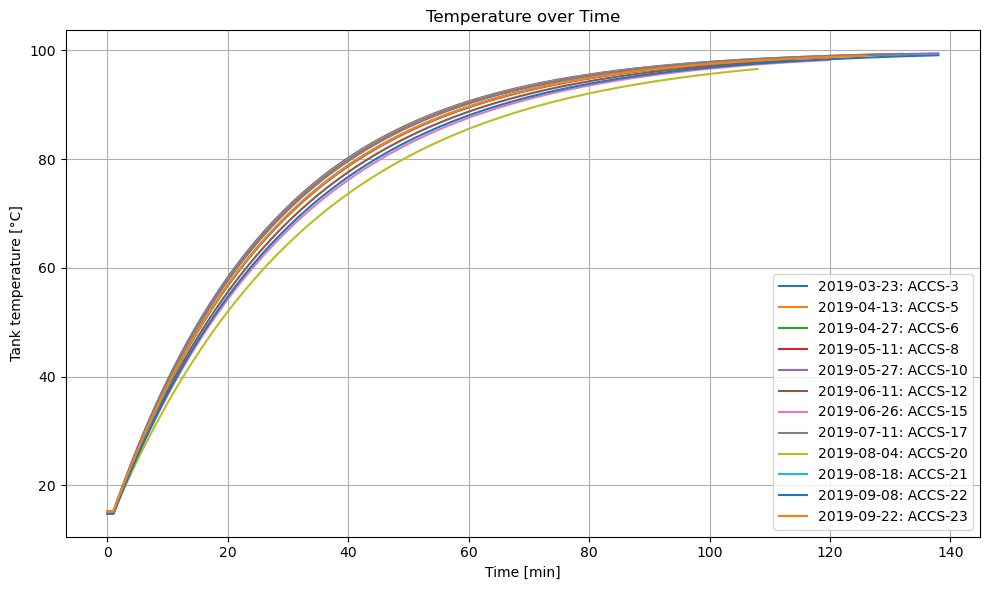

In [157]:
# Convert the DataFrame from task1_df
df1 = pd.DataFrame(task1_df)

# Convert the 'Start' and 'End' columns to datetime type
df1['Start'] = pd.to_datetime(df1['Start'])
df1['End'] = pd.to_datetime(df1['End'])

# Create DataFrame from the second table - Temperature
df_temp = pd.DataFrame(tank_temperature_df)

# Convert the 'Timestamp' column to datetime type, if it is not already
df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'])

plt.figure(figsize=(10, 6))  # Size of the plot

# Iterate over each row in the first DataFrame
for _, row in df1.iterrows():
    start_date = row['Start']
    end_date = row['End']
    
    # Filter the second DataFrame Temperature based on the date range
    filtered_df_temp = df_temp[(df_temp['Timestamp'] >= start_date) & (df_temp['Timestamp'] <= end_date)]
    
    # Calculate the time in minutes from zero
    filtered_df_temp['Minutes'] = (filtered_df_temp['Timestamp'] - filtered_df_temp['Timestamp'].min()).dt.total_seconds() / 60.0
    
    # Plot the temperature profile for the given date range
    plt.plot(filtered_df_temp['Minutes'], filtered_df_temp['Temperature'], linestyle='-', label=f'{row["ID"]}')

plt.title('Temperature over Time')  # Title
plt.xlabel('Time [min]')  # x-asis label
plt.ylabel('Tank temperature [°C]')  # y-axis label
plt.grid(True)  # Grid
plt.legend()  # Legend
plt.tight_layout()  # Adjustment of layout to ensure that everything fits
plt.show()  # Display

## Task 3

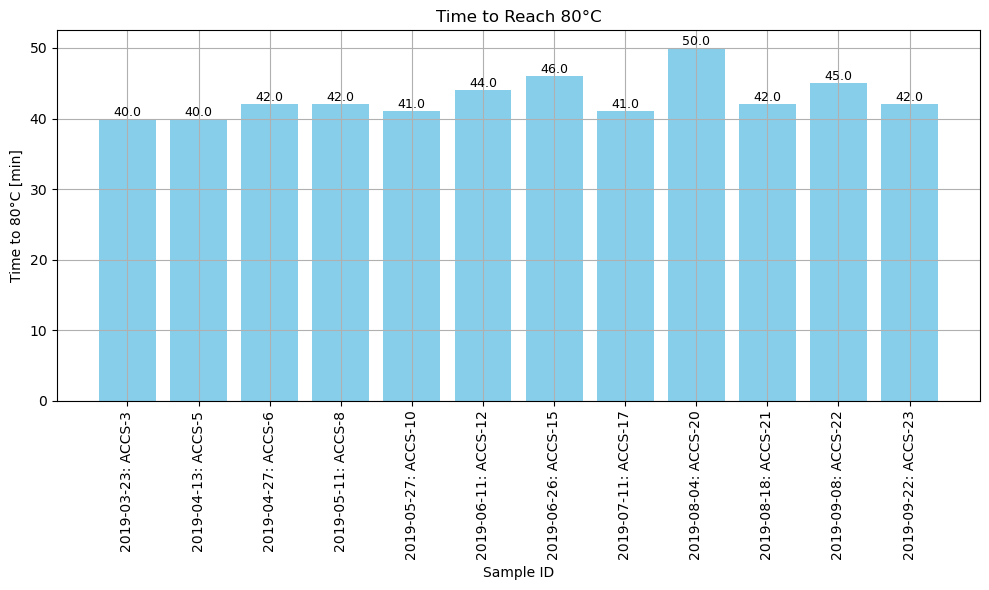

In [158]:
# Creating DataFrame from the first table
df1 = pd.DataFrame(task1_df)

# Convert 'Start' and 'End' columns to datetime:
df1['Start'] = pd.to_datetime(df1['Start'])
df1['End'] = pd.to_datetime(df1['End'])

# Creating DataFrame from the temperature table
df_temp = pd.DataFrame(tank_temperature_df)

# Convert 'Timestamp' column to datetime:
df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'])

# Initialize an empty list to store results
results = []

# Iterate over each row in the first DataFrame
for _, row in df1.iterrows():
    start_date = row['Start']
    end_date = row['End']
    
    # Filter the temperature DataFrame based on date range:
    filtered_df_temp = df_temp[(df_temp['Timestamp'] >= start_date) & (df_temp['Timestamp'] <= end_date)]
    
    # Find the time to reach 80°C
    try:
        time_to_80_degrees = filtered_df_temp.loc[filtered_df_temp['Temperature'] >= 80, 'Timestamp'].iloc[0] - start_date
        time_to_80_minutes = time_to_80_degrees.total_seconds() / 60.0
        results.append((row['ID'], time_to_80_minutes))
    except IndexError:
        # Except block if no temp is found
        results.append((row['ID'], np.nan))

# Create results DataFrame:
df_results = pd.DataFrame(results, columns=['ID', 'Time to 80°C (minutes)'])

# Plotting the Results
plt.figure(figsize=(10, 6))
bars = plt.bar(df_results['ID'], df_results['Time to 80°C (minutes)'], color='skyblue')

plt.title('Time to Reach 80°C')  # Title
plt.xlabel('Sample ID')  # x-axis label
plt.ylabel('Time to 80°C [min]')  # y-axis label
plt.grid(True)  # Griid

# Adjustment of x-axis labels
plt.xticks(rotation=90)  # 90 deg rotation

# Adding values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=9)

plt.tight_layout()  # Layout adjustment
plt.show()  # Display

## Task 4 - Model Development

/var/folders/5g/0h8r79gn2nlf9389yhprwdj80000gn/T/ipykernel_15477/806314649.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_temp['Minutes'] = (filtered_df_temp['Timestamp'] - start_date).dt.total_seconds() / 60.0


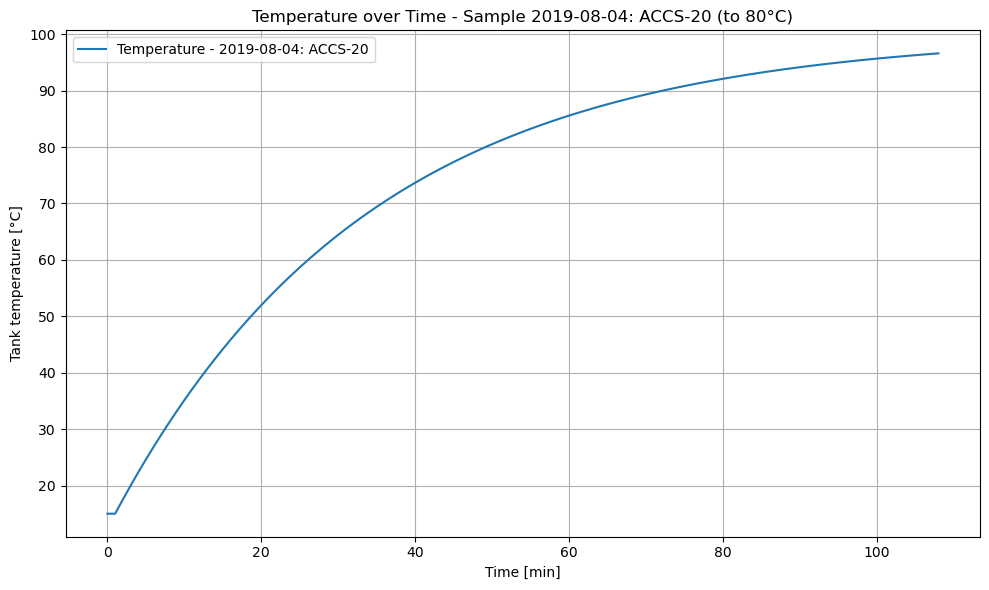

,Timestamp,Temperature,Minutes
197286,2019-08-06 00:06:00,15.052293,0.0
197287,2019-08-06 00:07:00,15.052293,1.0
197288,2019-08-06 00:08:00,17.566216,2.0
197289,2019-08-06 00:09:00,20.005742,3.0
197290,2019-08-06 00:10:00,22.373074,4.0
...,...,...,...
197390,2019-08-06 01:50:00,96.150804,104.0
197391,2019-08-06 01:51:00,96.264716,105.0
197392,2019-08-06 01:52:00,96.375257,106.0
197393,2019-08-06 01:53:00,96.482527,107.0


In [159]:
# Creating DataFrame from the first table
df1 = pd.DataFrame(task1_df)

# Convert 'Start' and 'End' columns to datetime:
df1['Start'] = pd.to_datetime(df1['Start'])
df1['End'] = pd.to_datetime(df1['End'])

# Creating DataFrame from the temperature table
df_temp = pd.DataFrame(tank_temperature_df)

# Convert the 'Timestamp' column to datetime type, if it is not already
df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'])

# Finding the Sample with Longest Heating Time to 80°C
max_time_idx = -1
max_time_to_80 = pd.Timedelta(0)

# Iterates through each row (row) in df1
for idx, row in df1.iterrows():
    start_date = row['Start']
    end_date = row['End']
    
    # Filtering df_temp based on date range
    filtered_df_temp = df_temp[(df_temp['Timestamp'] >= start_date) & (df_temp['Timestamp'] <= end_date)]
    
    # Finding when temperature reaches 80°C
    time_to_80 = filtered_df_temp.loc[filtered_df_temp['Temperature'] >= 80, 'Timestamp'].min()
    
    if pd.notnull(time_to_80):
        heating_time_to_80 = time_to_80 - start_date
        if heating_time_to_80 > max_time_to_80:
            max_time_to_80 = heating_time_to_80
            max_time_idx = idx

# Handling No Sample Reaching 80°C
if max_time_idx == -1:
    print("No samples reached 80°C.")
    exit()

# Visualization for the Longest Heating Time Sample
row = df1.iloc[max_time_idx]
start_date = row['Start']
end_date = row['End']

# Filtering the second Temperature table based on the date range
filtered_df_temp = df_temp[(df_temp['Timestamp'] >= start_date) & (df_temp['Timestamp'] <= end_date)]

# Calculation of time in minutes from the beginning of heating
filtered_df_temp['Minutes'] = (filtered_df_temp['Timestamp'] - start_date).dt.total_seconds() / 60.0

# Plotting the Data:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df_temp['Minutes'], filtered_df_temp['Temperature'], linestyle='-', label=f'Temperature - {row["ID"]}')

plt.title(f'Temperature over Time - Sample {row["ID"]} (to 80°C)')  # Title
plt.xlabel('Time [min]')  # x-axis label
plt.ylabel('Tank temperature [°C]')  # y-axis label
plt.grid(True)  # Grid
plt.legend()  # Legend
plt.tight_layout()  # Layout adjustment
plt.show()  # Display
model_input_data = filtered_df_temp 
model_input_data

In [160]:
# A function T_model that represents a temperature decay model over time t, governed by a parameter alpha.
def T_model(t, alpha):
    Tsource = 100  # Constant source temperature set to 100.
    Tstart = 15.052293 # Initial temp of the ACSS-20
    return Tsource - (Tsource - Tstart) * np.exp(-alpha * t) # Newton’s law of heating/cooling

# Experimental data
t_data = model_input_data['Minutes']
T_data = model_input_data['Temperature']

# Model fitting to data
popt, pcov = curve_fit(T_model, t_data, T_data)

# The coefficient controlling the rate of temperature decay in the model.
alpha = popt
print(f'Optimized parameter {alpha}')

Optimized parameter [0.02912678]


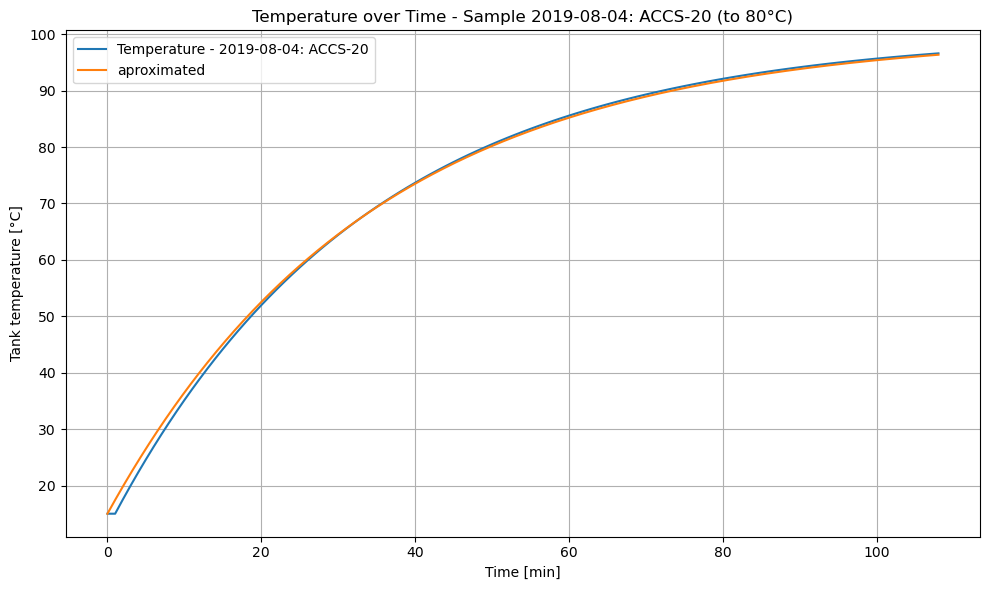

In [161]:
def aproximatedModel(Tstart, t):
    Tsource = 100  
    alpha = 0.02912678
    return Tsource - (Tsource - Tstart) * np.exp(-alpha * t)

model_minutes = np.linspace(t_data.min(), t_data.max(), 1000)
model_temperature = aproximatedModel(15.052293, model_minutes)

# Visualization of the temperature data generated by model and experimental data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df_temp['Minutes'], filtered_df_temp['Temperature'], linestyle='-', label=f'Temperature - {row["ID"]}')
plt.plot(model_minutes, model_temperature, linestyle='-', label='aproximated')

plt.title(f'Temperature over Time - Sample {row["ID"]} (to 80°C)')  
plt.xlabel('Time [min]')  
plt.ylabel('Tank temperature [°C]')  
plt.grid(True)  
plt.legend()  
plt.tight_layout()  
plt.show()  

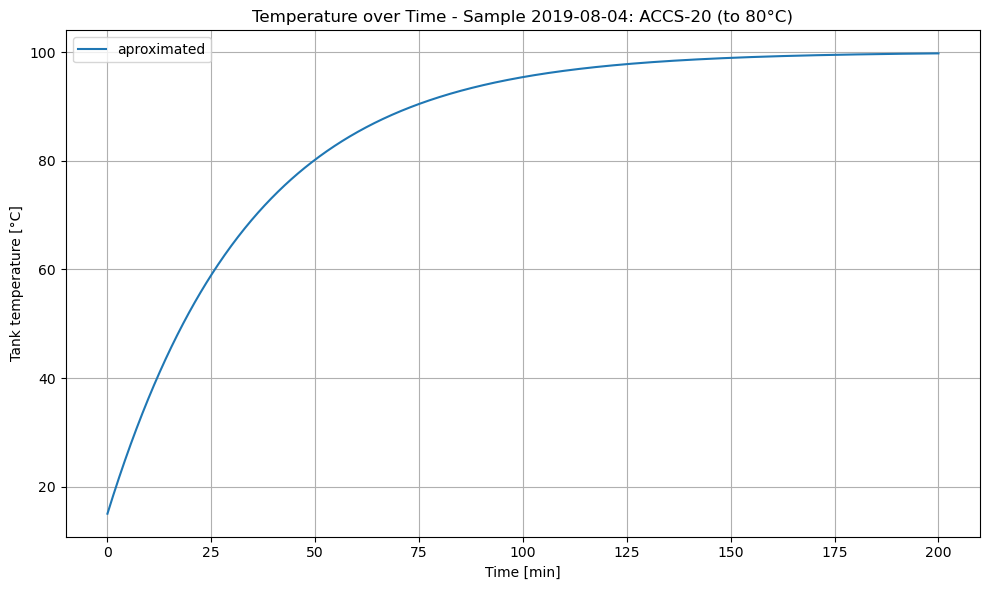

In [162]:
# Visualization of the temperature data generated by model
model_minutes = np.linspace(t_data.min(), 200, 1000)
model_temperature = aproximatedModel(15.052293, model_minutes)

# Rysowanie wykresu dla znalezionej próbki
plt.figure(figsize=(10, 6))
plt.plot(model_minutes, model_temperature, linestyle='-', label='aproximated')

plt.title(f'Temperature over Time - Sample {row["ID"]} (to 80°C)')  
plt.xlabel('Time [min]')  
plt.ylabel('Tank temperature [°C]')  
plt.grid(True)  
plt.legend()  
plt.tight_layout()  
plt.show()  

Task 4 – Model Application

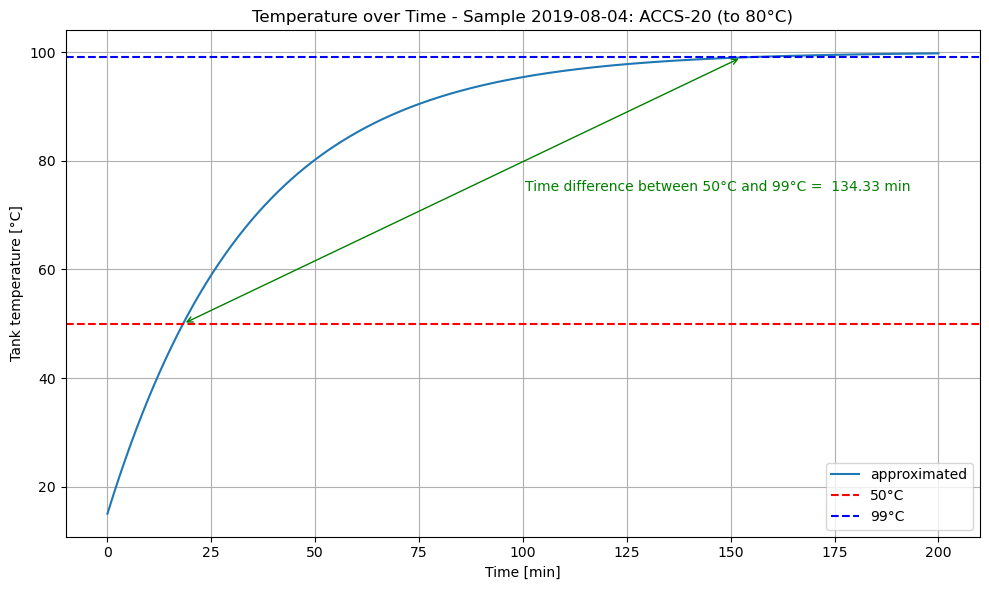

In [163]:
# Generating Model Data:
model_minutes = np.linspace(t_data.min(), 200, 1000) # Changed to 200 min to see more on a graph
model_temperature = aproximatedModel(15.052293, model_minutes)

# Finding the times at which temperature reaches 50°C and 99°C
time_50 = model_minutes[np.abs(model_temperature - 50).argmin()] # Finds the index of the time point where the temperature is closest to 50°C.
time_99 = model_minutes[np.abs(model_temperature - 99).argmin()]

# Plotting the approximated model
plt.figure(figsize=(10, 6))
plt.plot(model_minutes, model_temperature, linestyle='-', label='approximated')

# Adding horizontal lines at 50°C and 99°C
plt.axhline(y=50, color='red', linestyle='--', label='50°C')
plt.axhline(y=99, color='blue', linestyle='--', label='99°C')

# Adding vertical arrow between the two horizontal lines
plt.annotate(
    '', xy=(time_99, 99), xytext=(time_50, 50),
    arrowprops=dict(arrowstyle='<->', color='green')
)

# Calculating the time difference between the two temperature points
time_difference = time_99 - time_50

# Adding text with the time difference
plt.text(
    (time_50 + time_99) / 1.7, (50 + 99) / 2,
    f'Time difference between 50°C and 99°C =  {time_difference:.2f} min', horizontalalignment='left', color='green'
)

# Display
plt.title(f'Temperature over Time - Sample {row["ID"]} (to 80°C)')
plt.xlabel('Time [min]')
plt.ylabel('Tank temperature [°C]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
